<a href="https://colab.research.google.com/github/CarlosBrys/Llamadas-911-Agresion-Personas/blob/main/911_Delitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de Delitos Mediante Modelos de Aprendizaje de Máquina**

Con este proyecto se propone utilizar algoritmos de aprendizaje de máquina para hallar correlaciones que permitan hacer predicciones de hechos delictivos en un momento dado del tiempo, basados en
el registro histórico de llamadas al servicio de emergencias.

**dias**: conversion de la fecha a cantidad de dias (0-365)

**Total**: 365 registros

**Conjunto de datos**:
Datos observados para la cantidad de llamadas diarias reportando agresión a personas

**Conjunto de validación**: 
Conjunto datos aleatorios con una variación de +- 10 sobre el dato observado

**Modelo**: 
El modelo Red Neuronal Artificial tiene 4 capas densas con (1,128,128,1) neuronas respectivamente, la última capa es la capa de salida. Se usó el optimizador _adam_ y la funciones de activacion utilizadas son _linear_ para las capas de entrada y salida, y _relu_ para las capas ocultas


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import math
import numpy

In [3]:

DatosEntrenamiento = pd.read_csv('https://raw.githubusercontent.com/CarlosBrys/Llamadas-911-Agresion-Personas/main/datos/AgresionPersonas.csv')
DatosValidacion = pd.read_csv('https://raw.githubusercontent.com/CarlosBrys/Llamadas-911-Agresion-Personas/main/datos/AgresionPersonasValidacion.csv')
print(DatosEntrenamiento.shape)
print(DatosEntrenamiento.head())
print(DatosValidacion.shape)
print(DatosValidacion.head())

(365, 3)
      Fecha  Dia  Llamadas
0  01/01/20    1       584
1  02/01/20    2       236
2  03/01/20    3       288
3  04/01/20    4       324
4  05/01/20    5       365
(121, 2)
   Dia  Llamadas
0    4       315
1    6       227
2   10       309
3   12       442
4   14       343


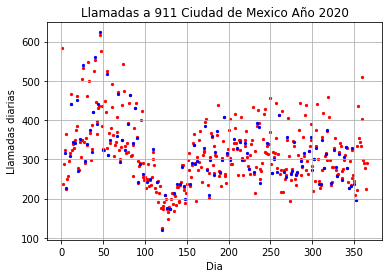

In [4]:
# Separar entre las variables de entrada (x) y salida (y) para el entrenamiento
datos_x = DatosEntrenamiento['Dia']
datos_y = DatosEntrenamiento['Llamadas']

# Separar entre las variables de entrada (x) y salida (y) para el entrenamiento
valida_x = DatosValidacion['Dia']
valida_y = DatosValidacion['Llamadas']

# Visualizar el conjunto de datos de entrenamiento
plt.title("Llamadas a 911 Ciudad de Mexico Año 2020")
plt.ylabel('Llamadas diarias')
plt.xlabel('Dia')
plt.grid()
plt.scatter(datos_x, datos_y, color = 'red', s=5) # Datos observados
plt.scatter(valida_x, valida_y, color = 'blue', s=5) # Conjunto de validacion
plt.show()


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

# Crear el modelo
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 16,899
Trainable params: 16,899
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Entrenar el modelo
model.fit(datos_x, datos_y, epochs=10000, verbose='auto')



Se truncaron las últimas líneas 5000 del resultado de transmisión.
Epoch 7501/10000
12/12 [==============================] - 0s 8ms/step - loss: 3655.5862 - accuracy: 0.0000e+00
Epoch 7502/10000
12/12 [==============================] - 0s 3ms/step - loss: 3661.2966 - accuracy: 0.0000e+00
Epoch 7503/10000
12/12 [==============================] - 0s 3ms/step - loss: 3637.5229 - accuracy: 0.0000e+00
Epoch 7504/10000
12/12 [==============================] - 0s 3ms/step - loss: 3670.9956 - accuracy: 0.0000e+00
Epoch 7505/10000
12/12 [==============================] - 0s 3ms/step - loss: 3680.3774 - accuracy: 0.0000e+00
Epoch 7506/10000
12/12 [==============================] - 0s 3ms/step - loss: 3630.5061 - accuracy: 0.0000e+00
Epoch 7507/10000
12/12 [==============================] - 0s 3ms/step - loss: 3693.6982 - accuracy: 0.0000e+00
Epoch 7508/10000
12/12 [==============================] - 0s 3ms/step - loss: 3651.7102 - accuracy: 0.0000e+00
Epoch 7509/10000
12/12 [=====================

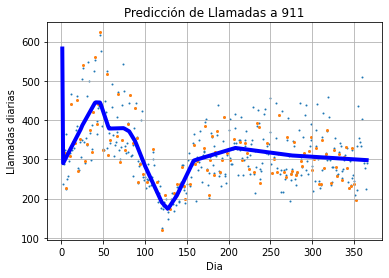

In [15]:
# Calcular la predicción del modelo
prediccion_y = model.predict(datos_x)

# Calcular la predicción de la validacion
validacion_y = model.predict(valida_x)


# Guardar las predicciones 
numpy.savetxt('entrenamiento.csv', prediccion_y, delimiter=',', header='Prediccion')  # para comparar con datos_y
numpy.savetxt('validacion.csv', validacion_y, delimiter=',', header='Prediccion')  # para comparar con valida_y


# Mostrar los resultados Observados, de Control y los Predichos
plt.title("Predicción de Llamadas a 911")
plt.ylabel('Llamadas diarias')
plt.xlabel('Dia')
plt.grid()
plt.scatter(datos_x, datos_y, s=1)
plt.scatter(valida_x, valida_y, s=4)
plt.plot(datos_x, prediccion_y, 'r', linewidth=4, color = 'blue')
plt.show()

R^2 del Conjunto de entrenamiento= 0.46178138483210773


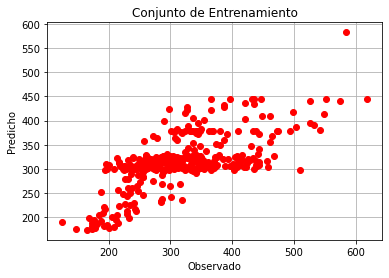

In [16]:
#Mostrar los valores actuales contra los predichos del entrenamiento
PrediccionEntrenamiento = pd.read_csv('entrenamiento.csv')
plt.plot(datos_y,PrediccionEntrenamiento,'ro')
plt.title('Conjunto de Entrenamiento')
plt.xlabel('Observado')
plt.ylabel('Predicho')
plt.grid()

#Calcular el valor de R-cuadrado para el conjunto de entrenamiento
ValorR2E = r2_score(datos_y,PrediccionEntrenamiento)
print("R^2 del Conjunto de entrenamiento=", ValorR2E)

R^2 del Conjunto de la  Validacion= 0.4711633152054978


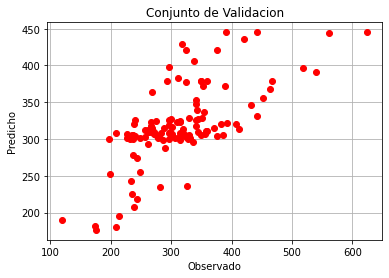

In [17]:
#Mostrar los valores actuales contra los predichos de la validacion
PrediccionValidacion = pd.read_csv('validacion.csv')
plt.plot(valida_y,PrediccionValidacion,'ro')
plt.title('Conjunto de Validacion')
plt.xlabel('Observado')
plt.ylabel('Predicho')
plt.grid()

#Calcular el valor de R-cuadrado para el conjunto de entrenamiento
ValorR2V = r2_score(valida_y,PrediccionValidacion)
print("R^2 del Conjunto de la  Validacion=", ValorR2V)